# Collegedunia -  Data Analysis Assesment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
from sklearn.impute import KNNImputer
from geopy.distance import geodesic


# User Demographics Analysis:Use users.csv to analyse user demographics, such as age, gender, and location.


In [2]:
users = pd.read_csv('./data/users.csv')
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [3]:
users.shape

(100000, 15)

In [4]:
users.isnull().sum()

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [6]:
# imputing the null values with the mode
mode_city = users['city'].mode()[0]
users['city'].fillna(mode_city, inplace=True)

### Distrubution of users based on gender

In [7]:
users.head(1)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00


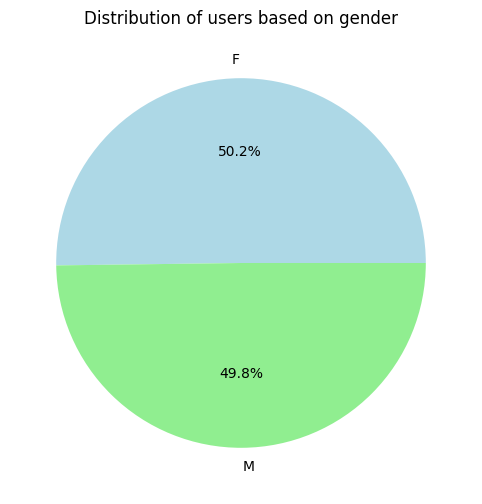

In [8]:
plt.figure(figsize=(10, 6))
users['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of users based on gender')
plt.ylabel('')  # Remove y-label
plt.show()

In [9]:
users.state.nunique()

229

In [10]:
users.country.nunique()

16

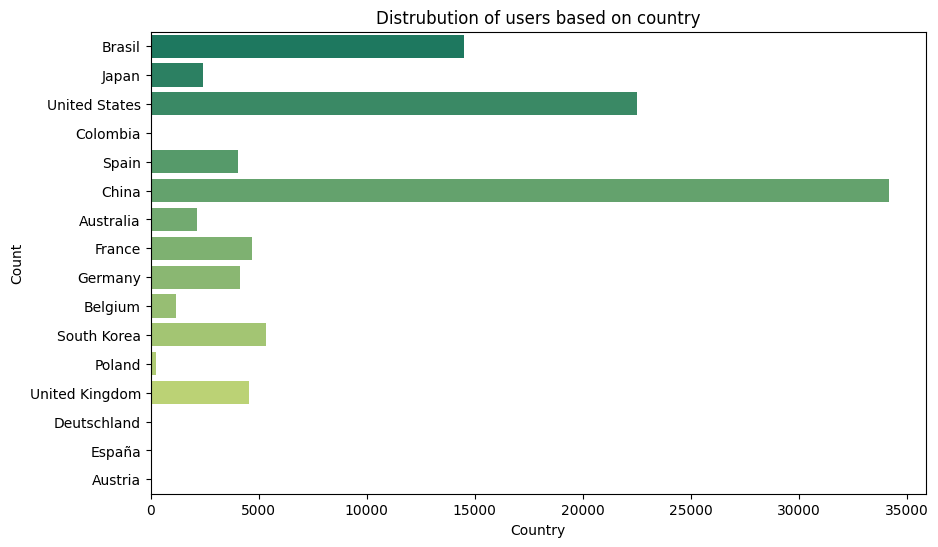

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=users, palette='summer')
plt.title('Distrubution of users based on country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Inference : Highest number of users are from china

##  Average age of users in each country

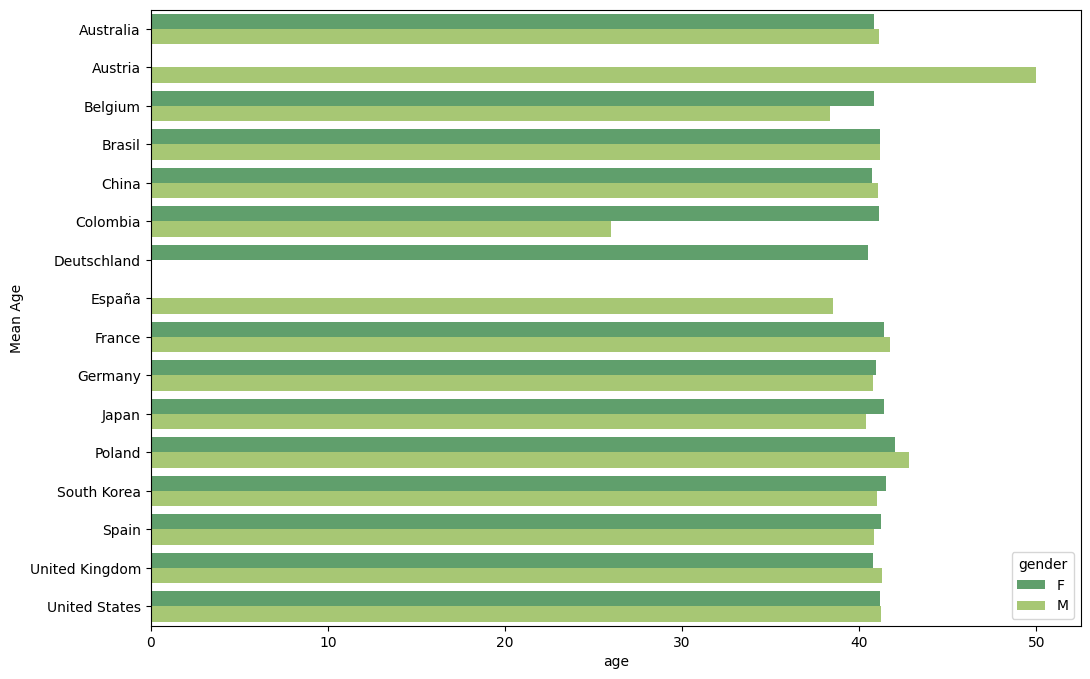

In [12]:
plt.figure(figsize=(12, 8))
user_country_gender = users.groupby(['country','gender'])['age'].mean()
user_country_gender = pd.DataFrame(user_country_gender)
sns.barplot(data=user_country_gender, y='country', x='age', hue='gender', palette='summer')
plt.ylabel('Mean Age')
plt.show()

## Distribution of gender in each country

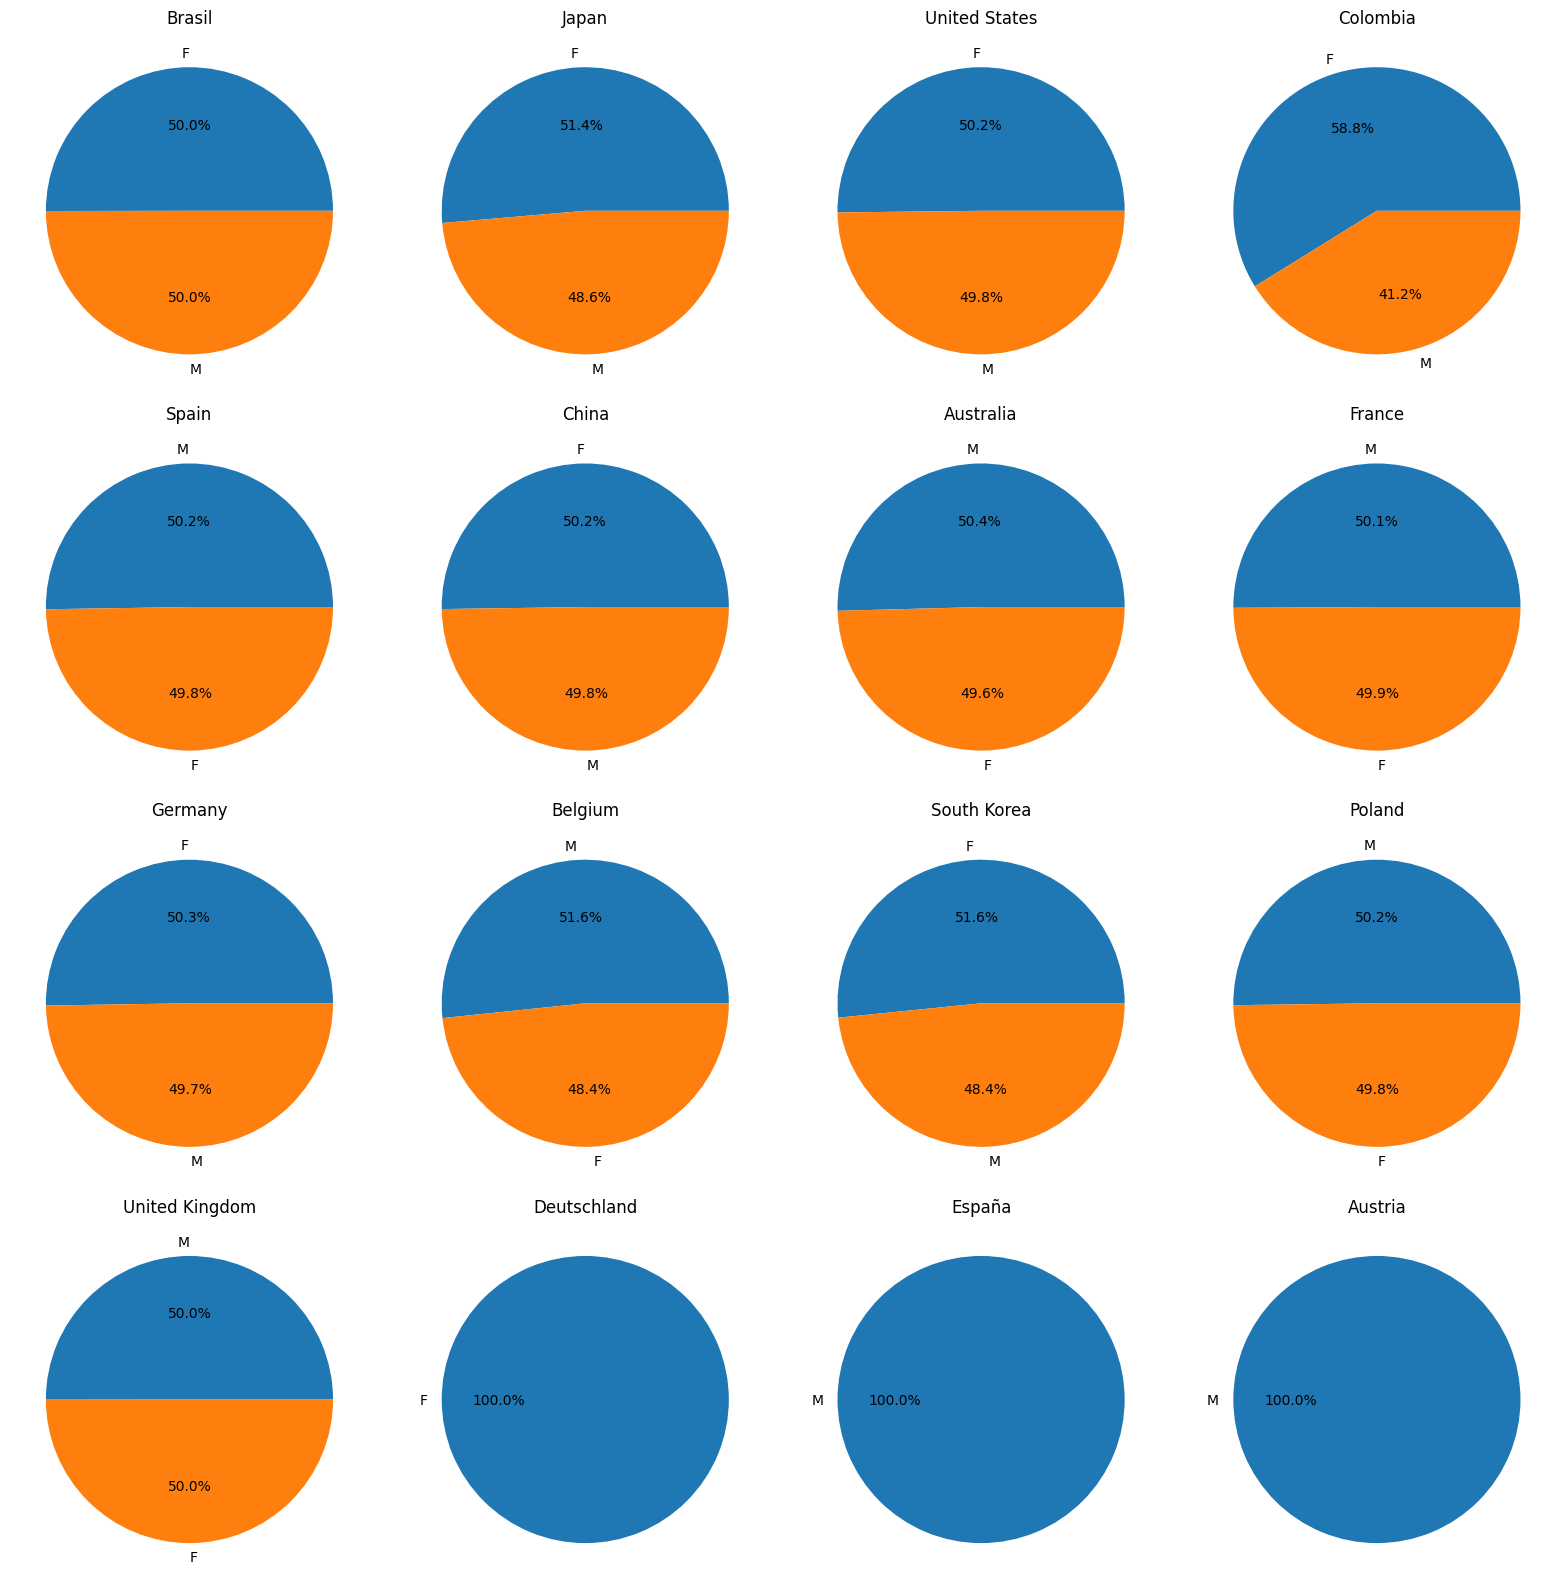

In [13]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
countries = users['country'].unique()

# Iterate over each country and create a pie chart for gender distribution
for i, country in enumerate(countries):
    ax = axs[i // 4, i % 4]
    country_data = users[users['country'] == country]
    ax.pie(country_data['gender'].value_counts(), labels=country_data['gender'].value_counts().index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## In Majority of country male-female ration is balanced

## Map for easier data visualization of 'users' dataset

In [14]:
mean_age_map = users.groupby('country')['age'].mean()
mean_age_map = pd.DataFrame(mean_age_map).reset_index()

In [15]:
mean_age_map['latitude'] = np.array([-25.2744, 47.5162, 50.8503, -14.235, 35.8617, 4.5709, 51.1657, 40.4637, 46.6034, 51.1657, 36.2048, 51.9194, 35.9078, 40.4637, 55.3781, 37.7749])
mean_age_map['longitude'] = np.array([133.7751, 14.5501, 4.3517, -51.9253, 104.1954, -74.2973, 10.4515, -3.7492, 1.4437, 10.4515, 138.2529, 19.1451, 127.7669, -3.7492, -3.4360, -122.4194])

In [16]:
import folium

# Create a map centered at a certain location
m = folium.Map(zoom_start=3)  # Centered at the United States

# Add markers for each distribution center
for index, row in mean_age_map.iterrows():
    folium.Marker(
    location=[row['latitude'],row['longitude']],
    tooltip=str(row['country'])+ "Mean age : " + str(row['age']),
    popup=row['age'],
    icon=folium.Icon(color="green"),
).add_to(m)

temp = users.sample(300,replace = False)
for index, row in temp.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['first_name']).add_to(m)

# Save the map as an HTML file
# m.save("distribution_centers_map.html")
m

In [17]:
count_traffic = users.groupby('country')['traffic_source'].count()
count_traffic = pd.DataFrame(count_traffic).reset_index()
count_traffic[['latitude','longitude']] = mean_age_map[['latitude','longitude']]

In [18]:
m = folium.Map(zoom_start=3)  # Centered at the United States

for index, row in count_traffic.iterrows():
    folium.Marker(
    location=[row['latitude'],row['longitude']],
    tooltip=str(row['country'])+ "Traffic Count : " + str(row['traffic_source']),
#     popup=row['age'],
    icon=folium.Icon(color="green"),
).add_to(m)
m

## Traffic Source in each country (Bar Graph)

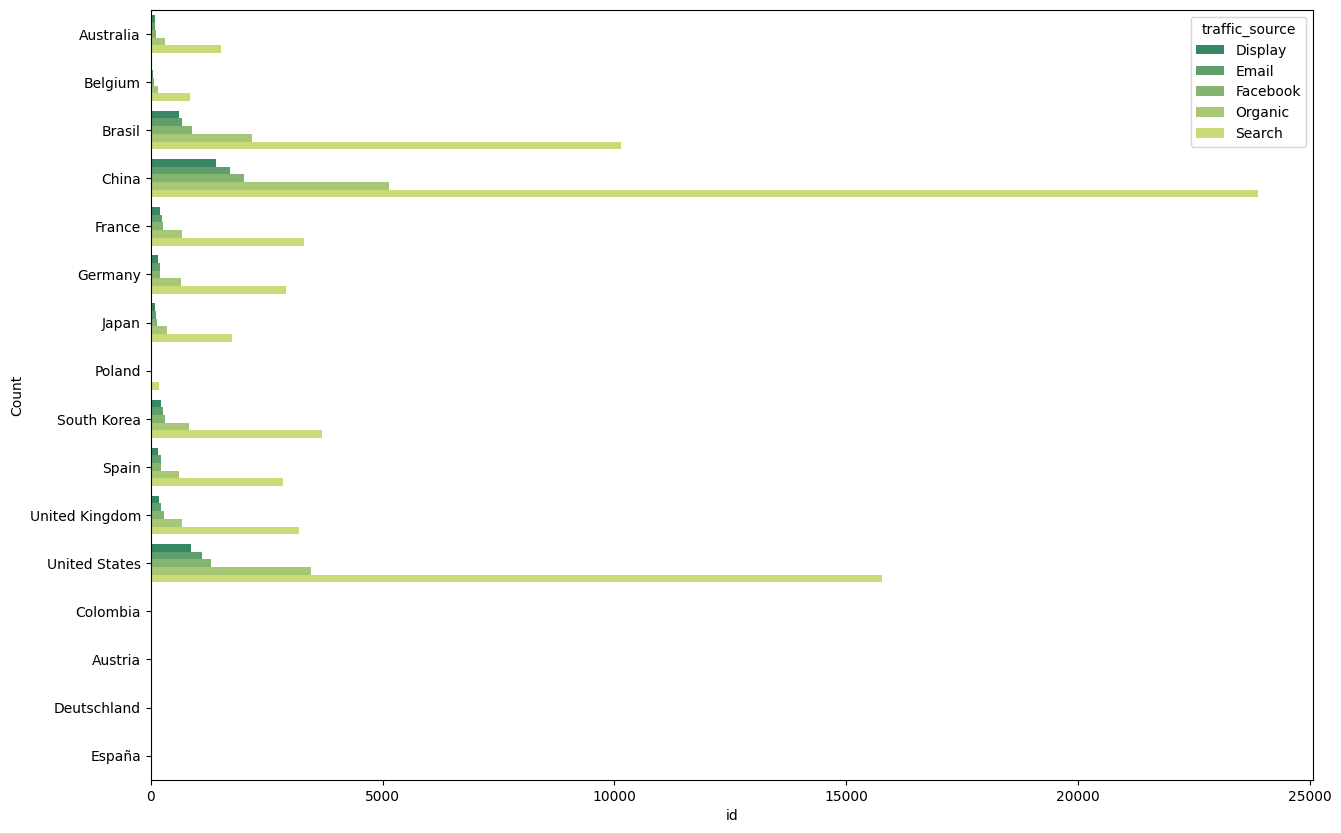

In [19]:
plt.figure(figsize=(15,10))
user_traffic_gender = users.groupby(['traffic_source','country'])['id'].count()
user_traffic_gender = pd.DataFrame(user_traffic_gender)
sns.barplot(data=user_traffic_gender, y='country', x='id', hue='traffic_source', palette='summer')
plt.ylabel('Count')
plt.show()

#### Pie Chart

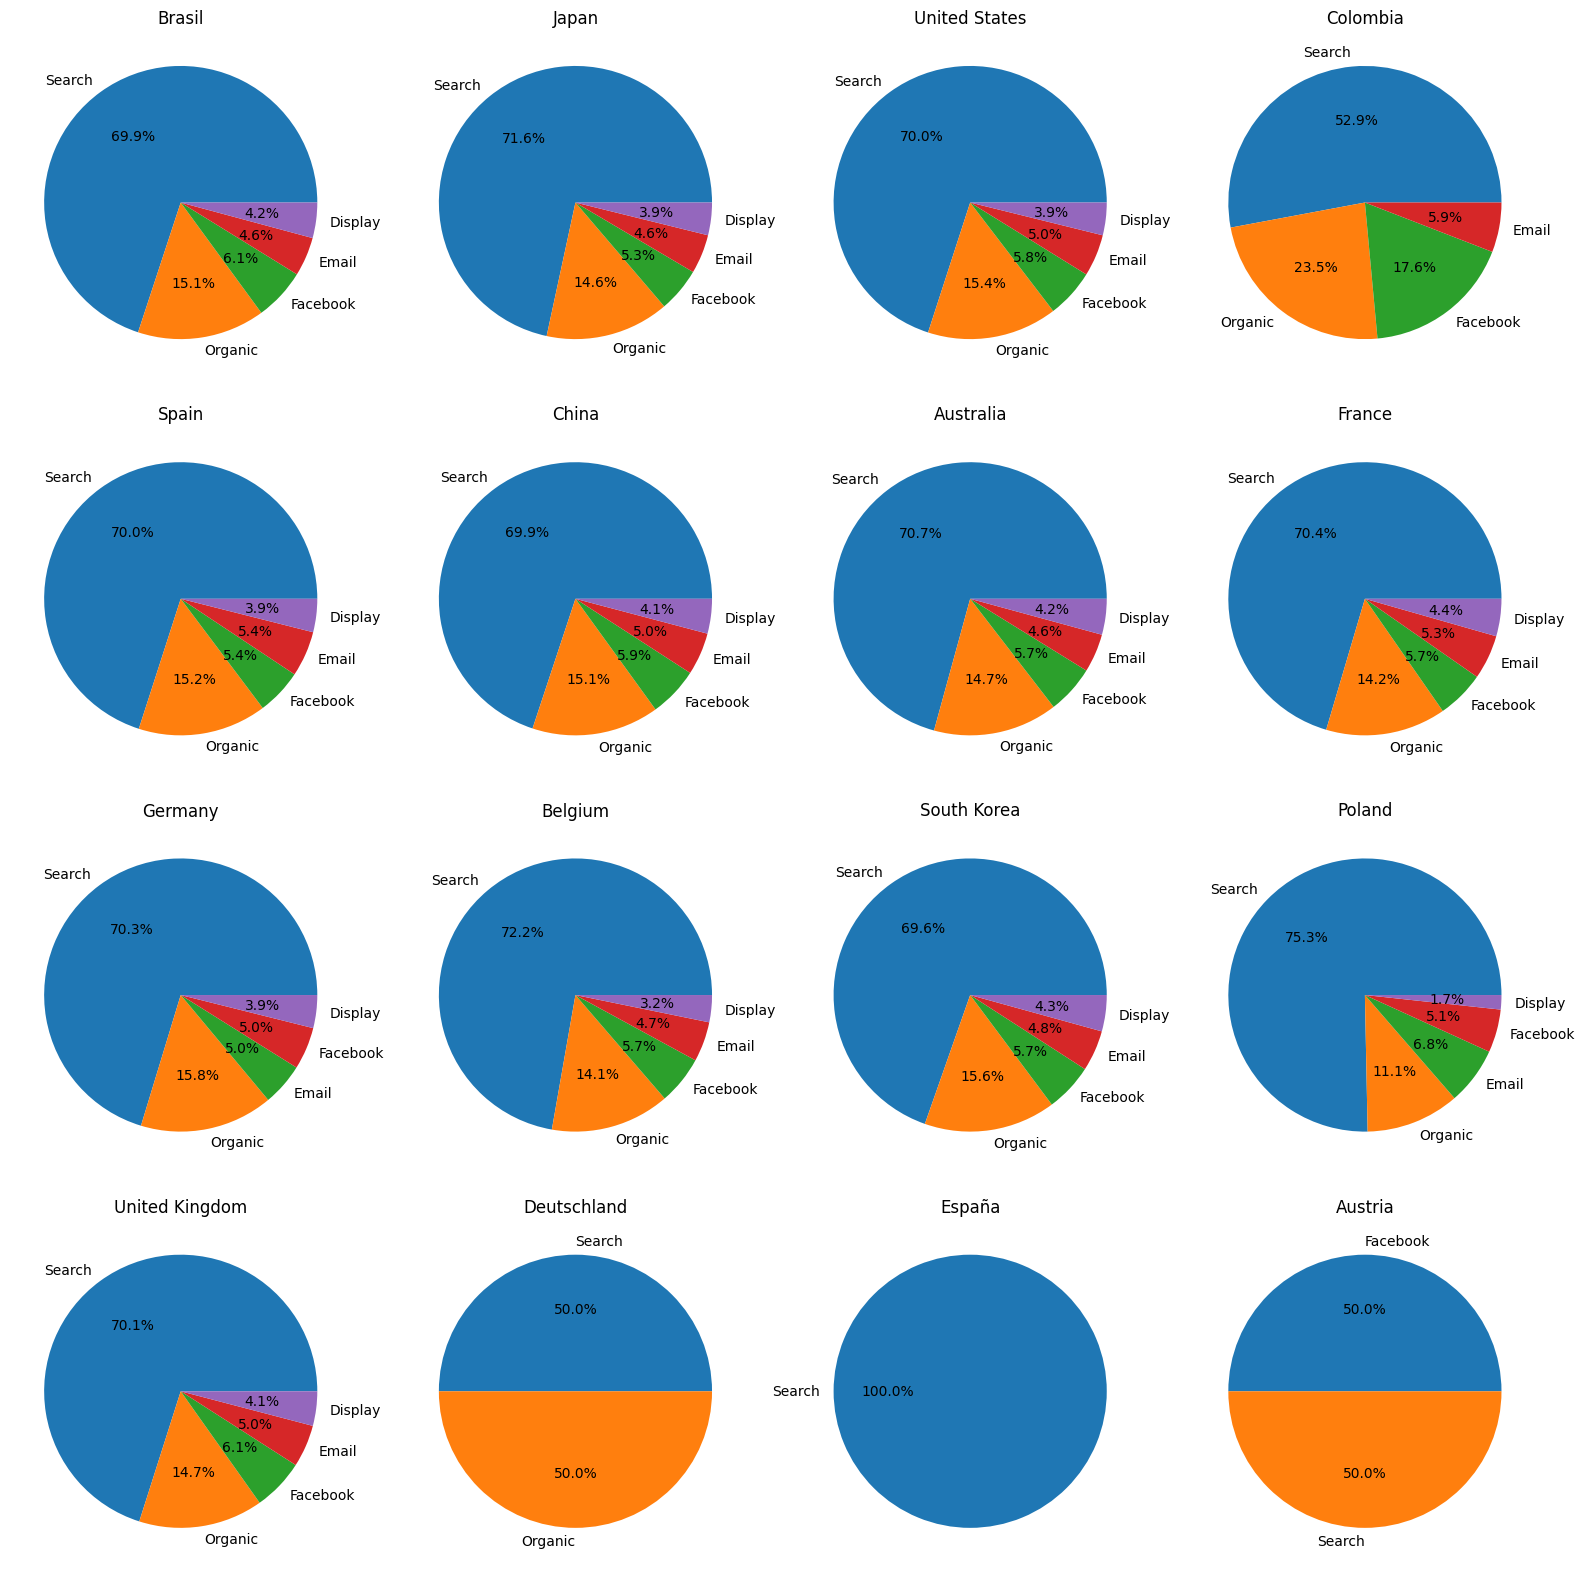

In [20]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
countries = users['country'].unique()

# Iterate over each country and create a pie chart for gender distribution
for i, country in enumerate(countries):
    ax = axs[i // 4, i % 4]
    country_data = users[users['country'] == country]
    ax.pie(country_data['traffic_source'].value_counts(), labels=country_data['traffic_source'].value_counts().index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## In all country main contributor to traffic_source is 'search'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


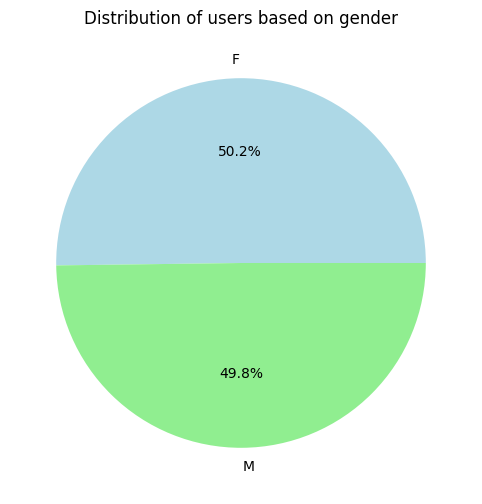

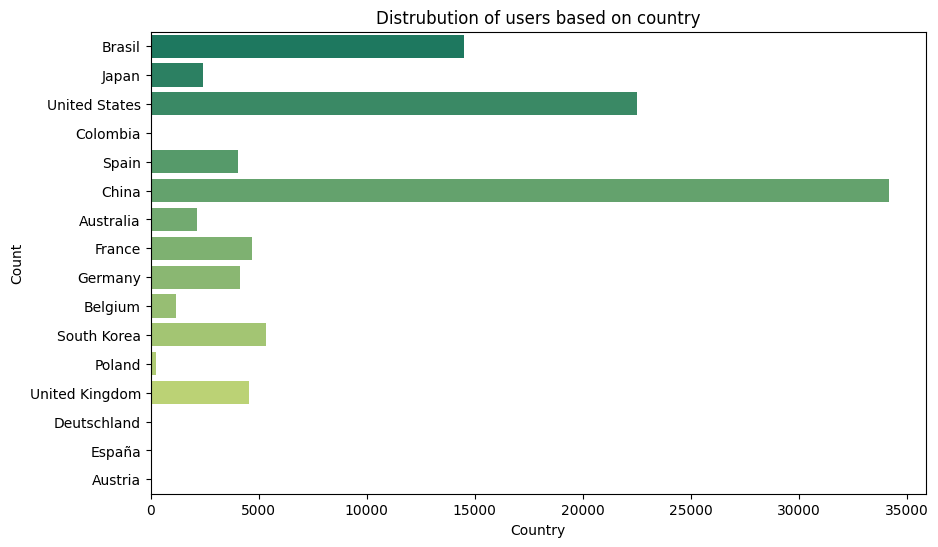

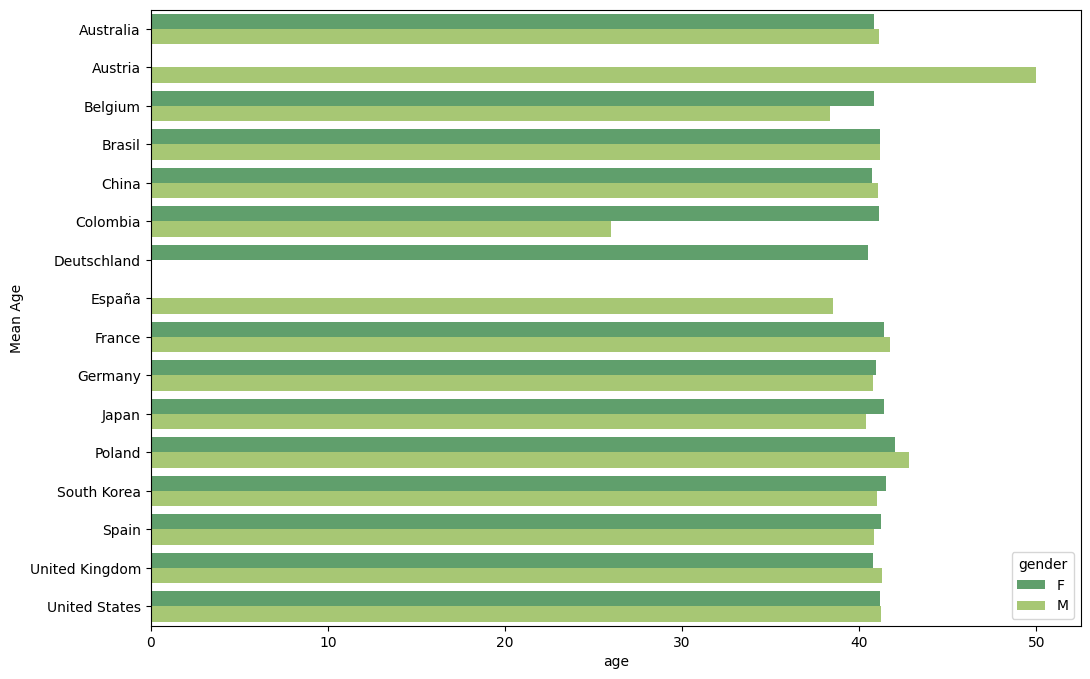

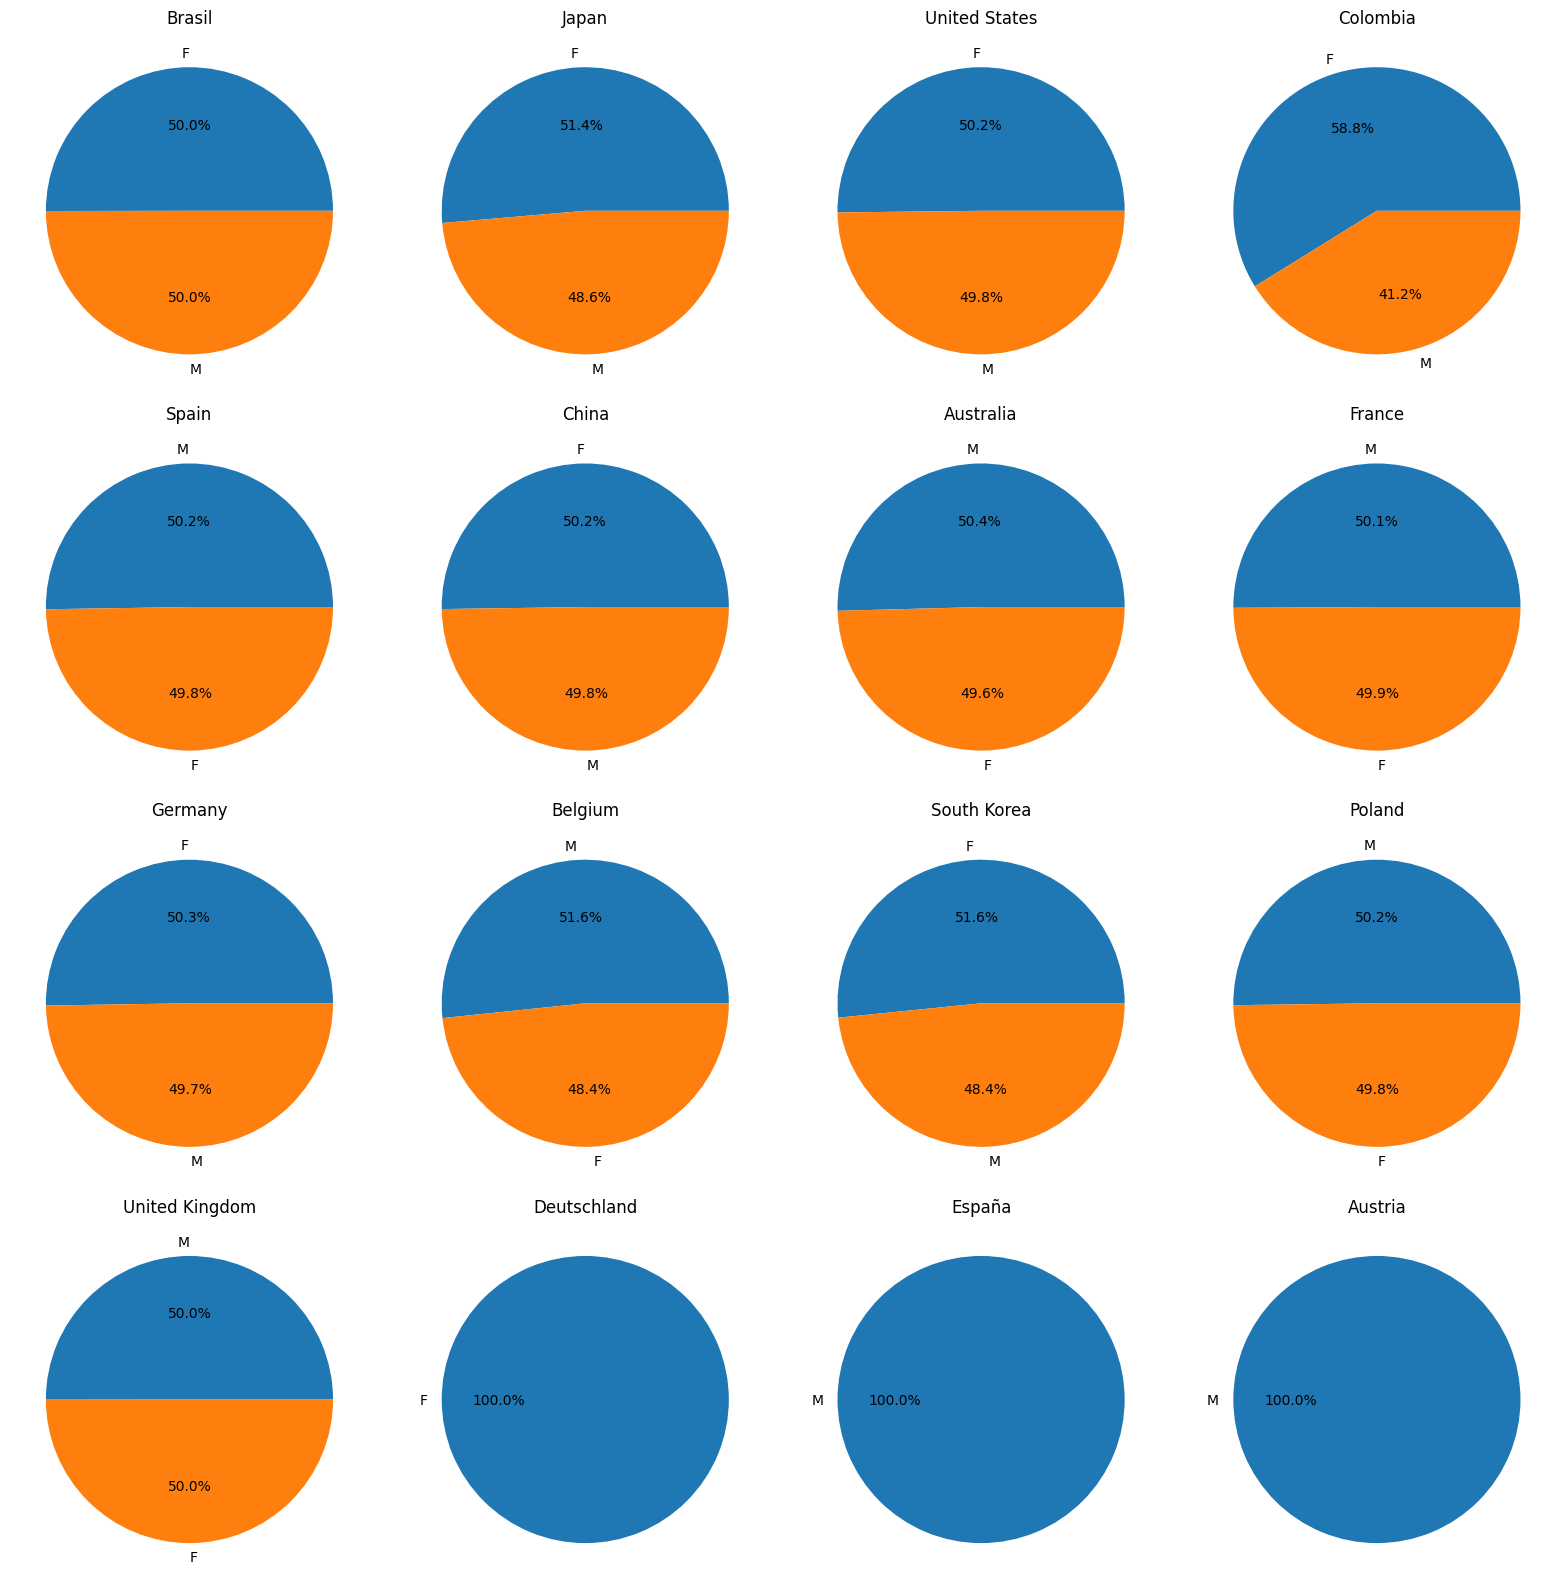

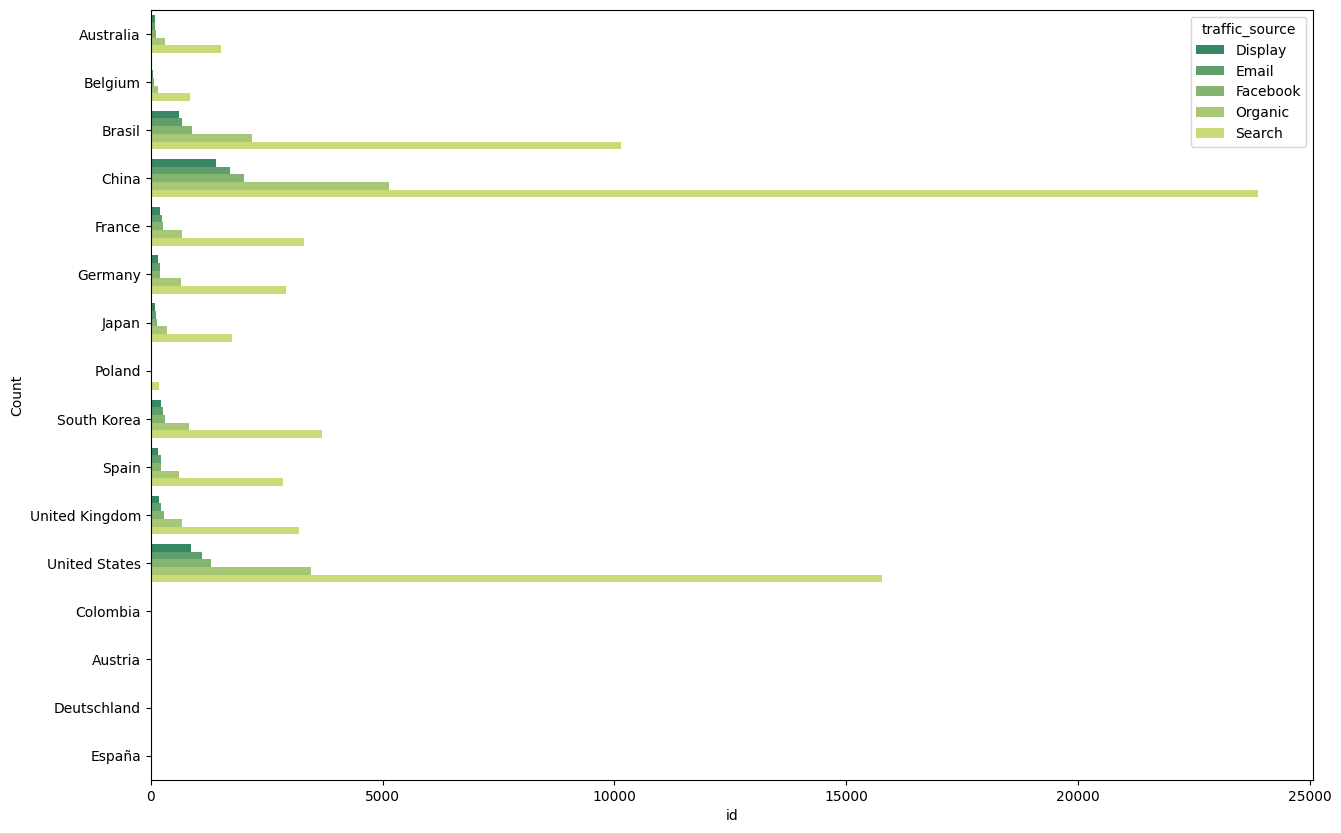

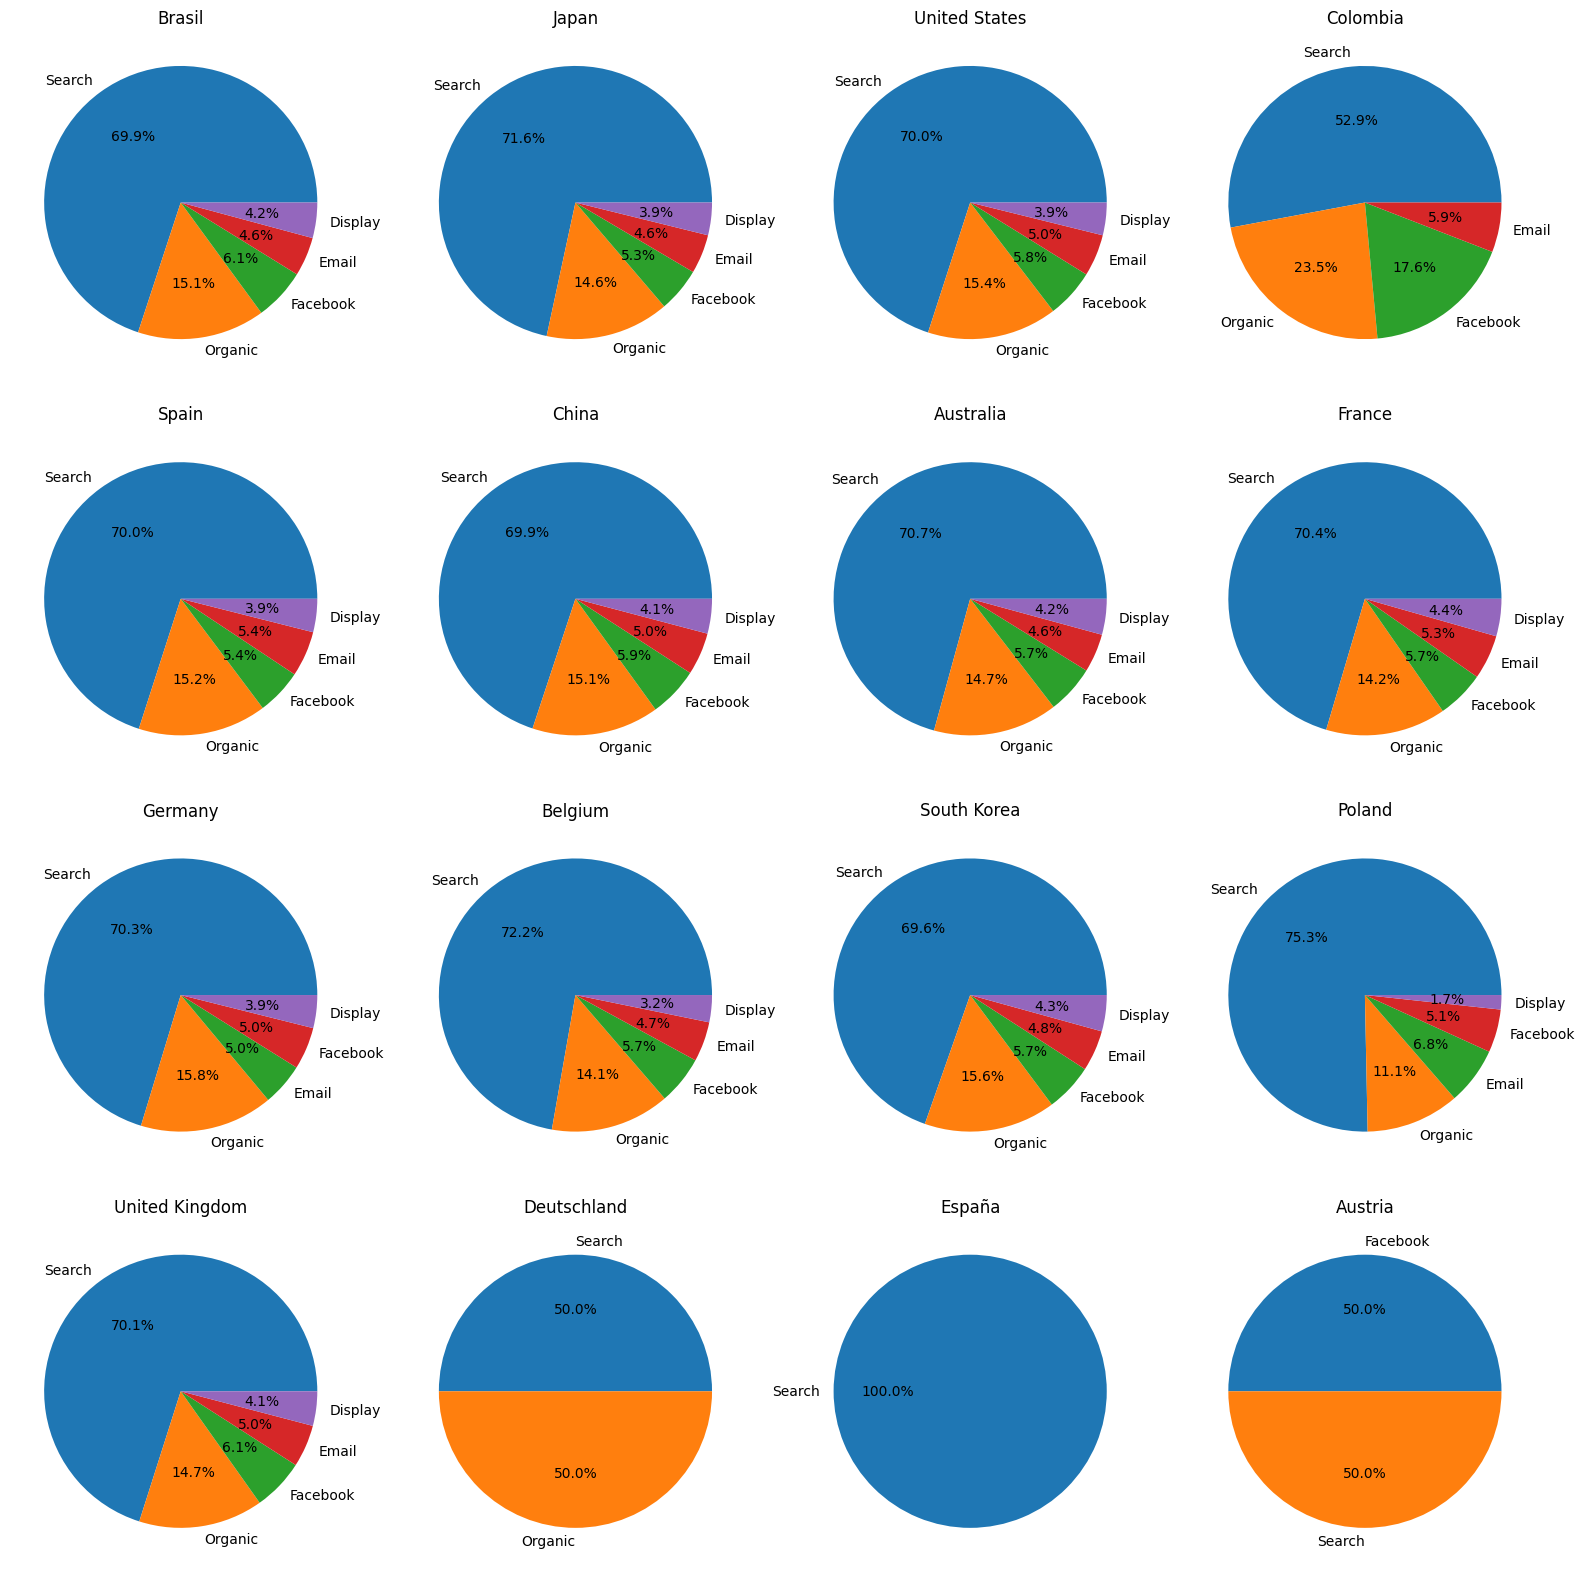

In [21]:
# User Demographics Analysis:Use users.csv to analyse user demographics, such as age, gender, and location.


users = pd.read_csv('./data/users.csv')
users.head()

users.shape

users.isnull().sum()

users.info()



# imputing the null values with the mode
mode_city = users['city'].mode()[0]
users['city'].fillna(mode_city, inplace=True)

### Distrubution of users based on gender

users.head(1)

plt.figure(figsize=(10, 6))
users['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of users based on gender')
plt.ylabel('')  # Remove y-label
plt.show()

users.state.nunique()

users.country.nunique()

plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=users, palette='summer')
plt.title('Distrubution of users based on country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Inference : Highest number of users are from china

##  Average age of users in each country

plt.figure(figsize=(12, 8))
user_country_gender = users.groupby(['country','gender'])['age'].mean()
user_country_gender = pd.DataFrame(user_country_gender)
sns.barplot(data=user_country_gender, y='country', x='age', hue='gender', palette='summer')
plt.ylabel('Mean Age')
plt.show()

## Distribution of gender in each country

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
countries = users['country'].unique()

# Iterate over each country and create a pie chart for gender distribution
for i, country in enumerate(countries):
    ax = axs[i // 4, i % 4]
    country_data = users[users['country'] == country]
    ax.pie(country_data['gender'].value_counts(), labels=country_data['gender'].value_counts().index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## In Majority of country male-female ration is balanced





## Map for easier data visualization of 'users' dataset

mean_age_map = users.groupby('country')['age'].mean()
mean_age_map = pd.DataFrame(mean_age_map).reset_index()

mean_age_map['latitude'] = np.array([-25.2744, 47.5162, 50.8503, -14.235, 35.8617, 4.5709, 51.1657, 40.4637, 46.6034, 51.1657, 36.2048, 51.9194, 35.9078, 40.4637, 55.3781, 37.7749])
mean_age_map['longitude'] = np.array([133.7751, 14.5501, 4.3517, -51.9253, 104.1954, -74.2973, 10.4515, -3.7492, 1.4437, 10.4515, 138.2529, 19.1451, 127.7669, -3.7492, -3.4360, -122.4194])

import folium

# Create a map centered at a certain location
m = folium.Map(zoom_start=3)  # Centered at the United States

# Add markers for each distribution center
for index, row in mean_age_map.iterrows():
    folium.Marker(
    location=[row['latitude'],row['longitude']],
    tooltip=str(row['country'])+ "Mean age : " + str(row['age']),
    popup=row['age'],
    icon=folium.Icon(color="green"),
).add_to(m)

temp = users.sample(300,replace = False)
for index, row in temp.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['first_name']).add_to(m)

# Save the map as an HTML file
# m.save("distribution_centers_map.html")
m

count_traffic = users.groupby('country')['traffic_source'].count()
count_traffic = pd.DataFrame(count_traffic).reset_index()
count_traffic[['latitude','longitude']] = mean_age_map[['latitude','longitude']]

m = folium.Map(zoom_start=3)  # Centered at the United States

for index, row in count_traffic.iterrows():
    folium.Marker(
    location=[row['latitude'],row['longitude']],
    tooltip=str(row['country'])+ "Traffic Count : " + str(row['traffic_source']),
#     popup=row['age'],
    icon=folium.Icon(color="green"),
).add_to(m)
m

## Traffic Source in each country (Bar Graph)

plt.figure(figsize=(15,10))
user_traffic_gender = users.groupby(['traffic_source','country'])['id'].count()
user_traffic_gender = pd.DataFrame(user_traffic_gender)
sns.barplot(data=user_traffic_gender, y='country', x='id', hue='traffic_source', palette='summer')
plt.ylabel('Count')
plt.show()

#### Pie Chart

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
countries = users['country'].unique()

# Iterate over each country and create a pie chart for gender distribution
for i, country in enumerate(countries):
    ax = axs[i // 4, i % 4]
    country_data = users[users['country'] == country]
    ax.pie(country_data['traffic_source'].value_counts(), labels=country_data['traffic_source'].value_counts().index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## In all country main contributor to traffic_source is 'search'





# User Demographics Analysis:Use users.csv to analyse user demographics, such as age, gender, and location.


In [22]:
users = pd.read_csv('./data/users.csv')
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [23]:
users.shape

(100000, 15)

In [24]:
users.isnull().sum()

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [26]:
# imputing the null values with the mode
mode_city = users['city'].mode()[0]
users['city'].fillna(mode_city, inplace=True)

### Distrubution of users based on gender

In [27]:
users.head(1)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00


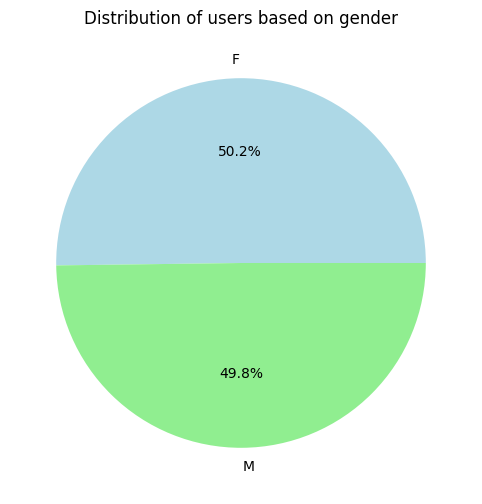

In [28]:
plt.figure(figsize=(10, 6))
users['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of users based on gender')
plt.ylabel('')  # Remove y-label
plt.show()

In [29]:
users.state.nunique()

229

In [30]:
users.country.nunique()

16

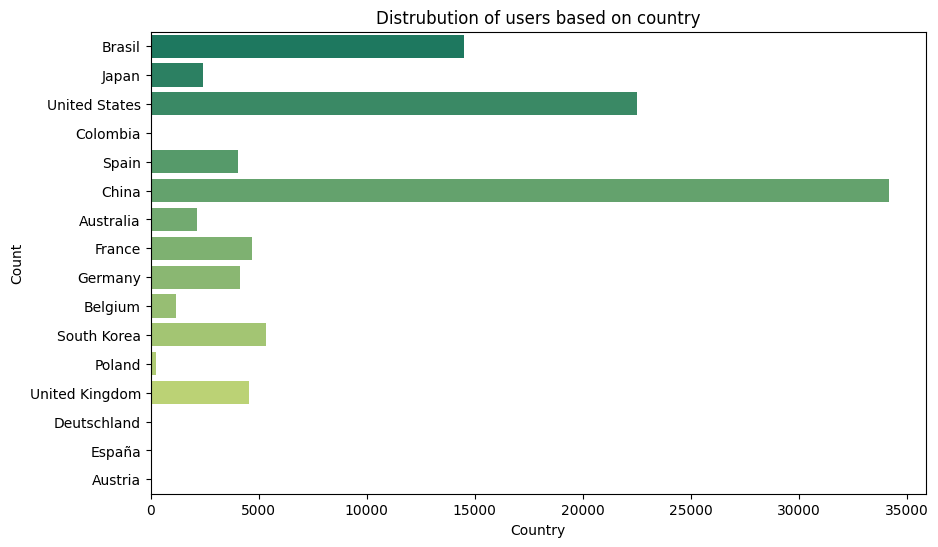

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=users, palette='summer')
plt.title('Distrubution of users based on country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Inference : Highest number of users are from china

##  Average age of users in each country

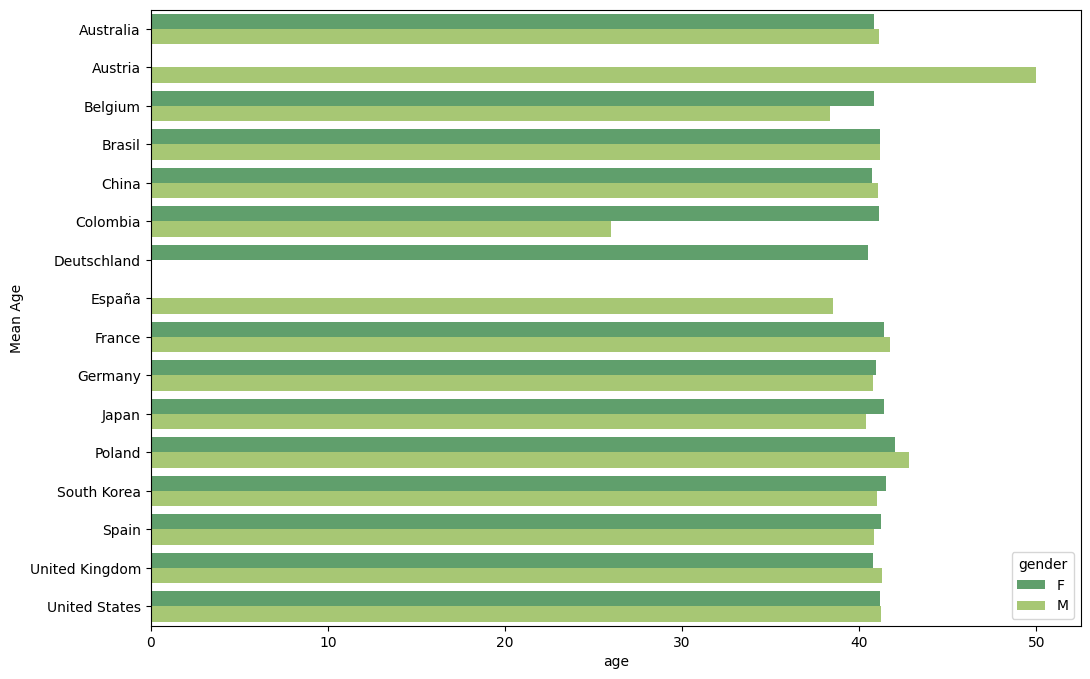

In [32]:
plt.figure(figsize=(12, 8))
user_country_gender = users.groupby(['country','gender'])['age'].mean()
user_country_gender = pd.DataFrame(user_country_gender)
sns.barplot(data=user_country_gender, y='country', x='age', hue='gender', palette='summer')
plt.ylabel('Mean Age')
plt.show()

## Distribution of gender in each country

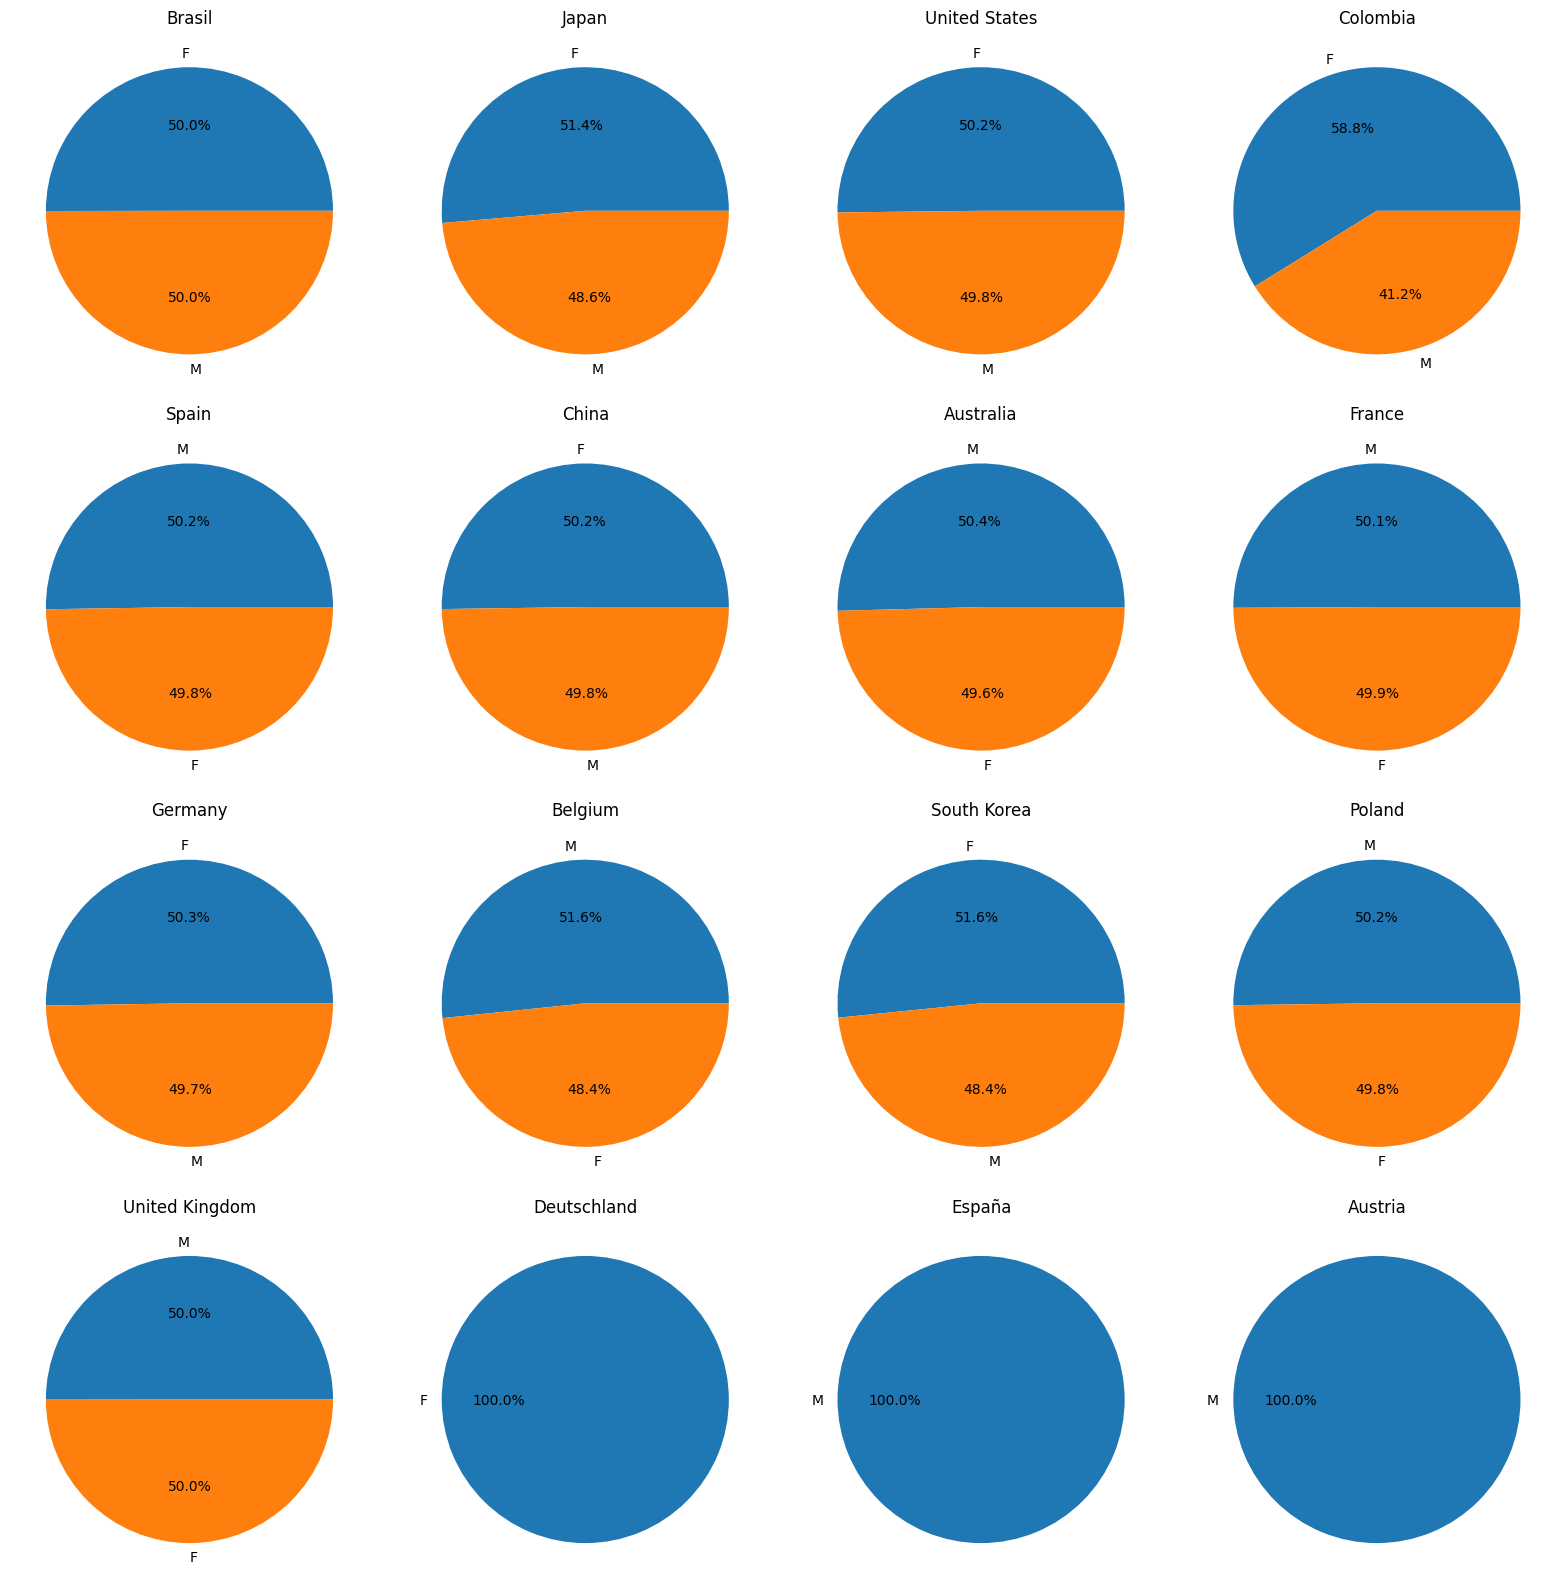

In [33]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
countries = users['country'].unique()

# Iterate over each country and create a pie chart for gender distribution
for i, country in enumerate(countries):
    ax = axs[i // 4, i % 4]
    country_data = users[users['country'] == country]
    ax.pie(country_data['gender'].value_counts(), labels=country_data['gender'].value_counts().index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## In Majority of country male-female ration is balanced

## Map for easier data visualization of 'users' dataset

In [34]:
mean_age_map = users.groupby('country')['age'].mean()
mean_age_map = pd.DataFrame(mean_age_map).reset_index()

In [35]:
mean_age_map['latitude'] = np.array([-25.2744, 47.5162, 50.8503, -14.235, 35.8617, 4.5709, 51.1657, 40.4637, 46.6034, 51.1657, 36.2048, 51.9194, 35.9078, 40.4637, 55.3781, 37.7749])
mean_age_map['longitude'] = np.array([133.7751, 14.5501, 4.3517, -51.9253, 104.1954, -74.2973, 10.4515, -3.7492, 1.4437, 10.4515, 138.2529, 19.1451, 127.7669, -3.7492, -3.4360, -122.4194])

In [36]:
import folium

# Create a map centered at a certain location
m = folium.Map(zoom_start=3)  # Centered at the United States

# Add markers for each distribution center
for index, row in mean_age_map.iterrows():
    folium.Marker(
    location=[row['latitude'],row['longitude']],
    tooltip=str(row['country'])+ "Mean age : " + str(row['age']),
    popup=row['age'],
    icon=folium.Icon(color="green"),
).add_to(m)

temp = users.sample(300,replace = False)
for index, row in temp.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['first_name']).add_to(m)

# Save the map as an HTML file
# m.save("distribution_centers_map.html")
m

In [37]:
count_traffic = users.groupby('country')['traffic_source'].count()
count_traffic = pd.DataFrame(count_traffic).reset_index()
count_traffic[['latitude','longitude']] = mean_age_map[['latitude','longitude']]

In [38]:
m = folium.Map(zoom_start=3)  # Centered at the United States

for index, row in count_traffic.iterrows():
    folium.Marker(
    location=[row['latitude'],row['longitude']],
    tooltip=str(row['country'])+ "Traffic Count : " + str(row['traffic_source']),
#     popup=row['age'],
    icon=folium.Icon(color="green"),
).add_to(m)
m

## Traffic Source in each country (Bar Graph)

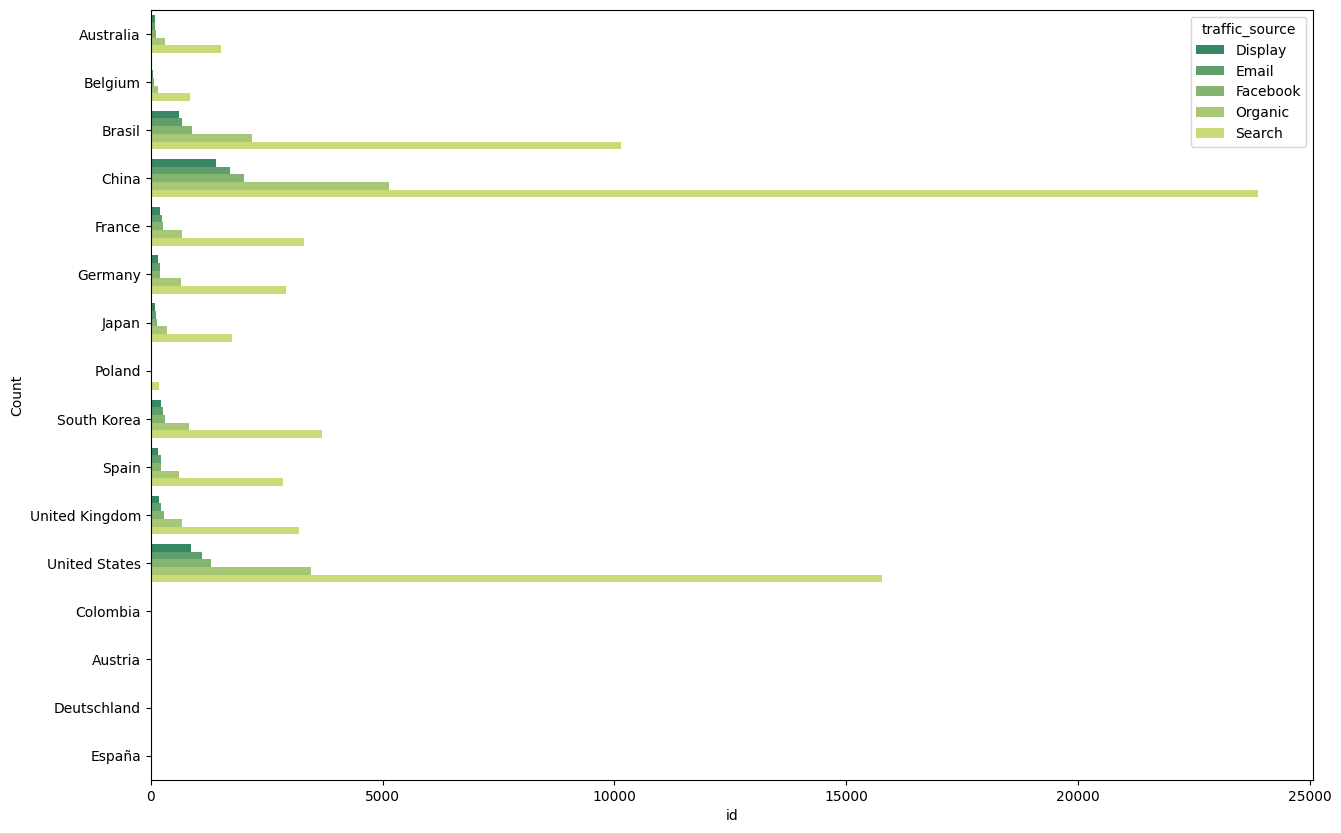

In [39]:
plt.figure(figsize=(15,10))
user_traffic_gender = users.groupby(['traffic_source','country'])['id'].count()
user_traffic_gender = pd.DataFrame(user_traffic_gender)
sns.barplot(data=user_traffic_gender, y='country', x='id', hue='traffic_source', palette='summer')
plt.ylabel('Count')
plt.show()

#### Pie Chart

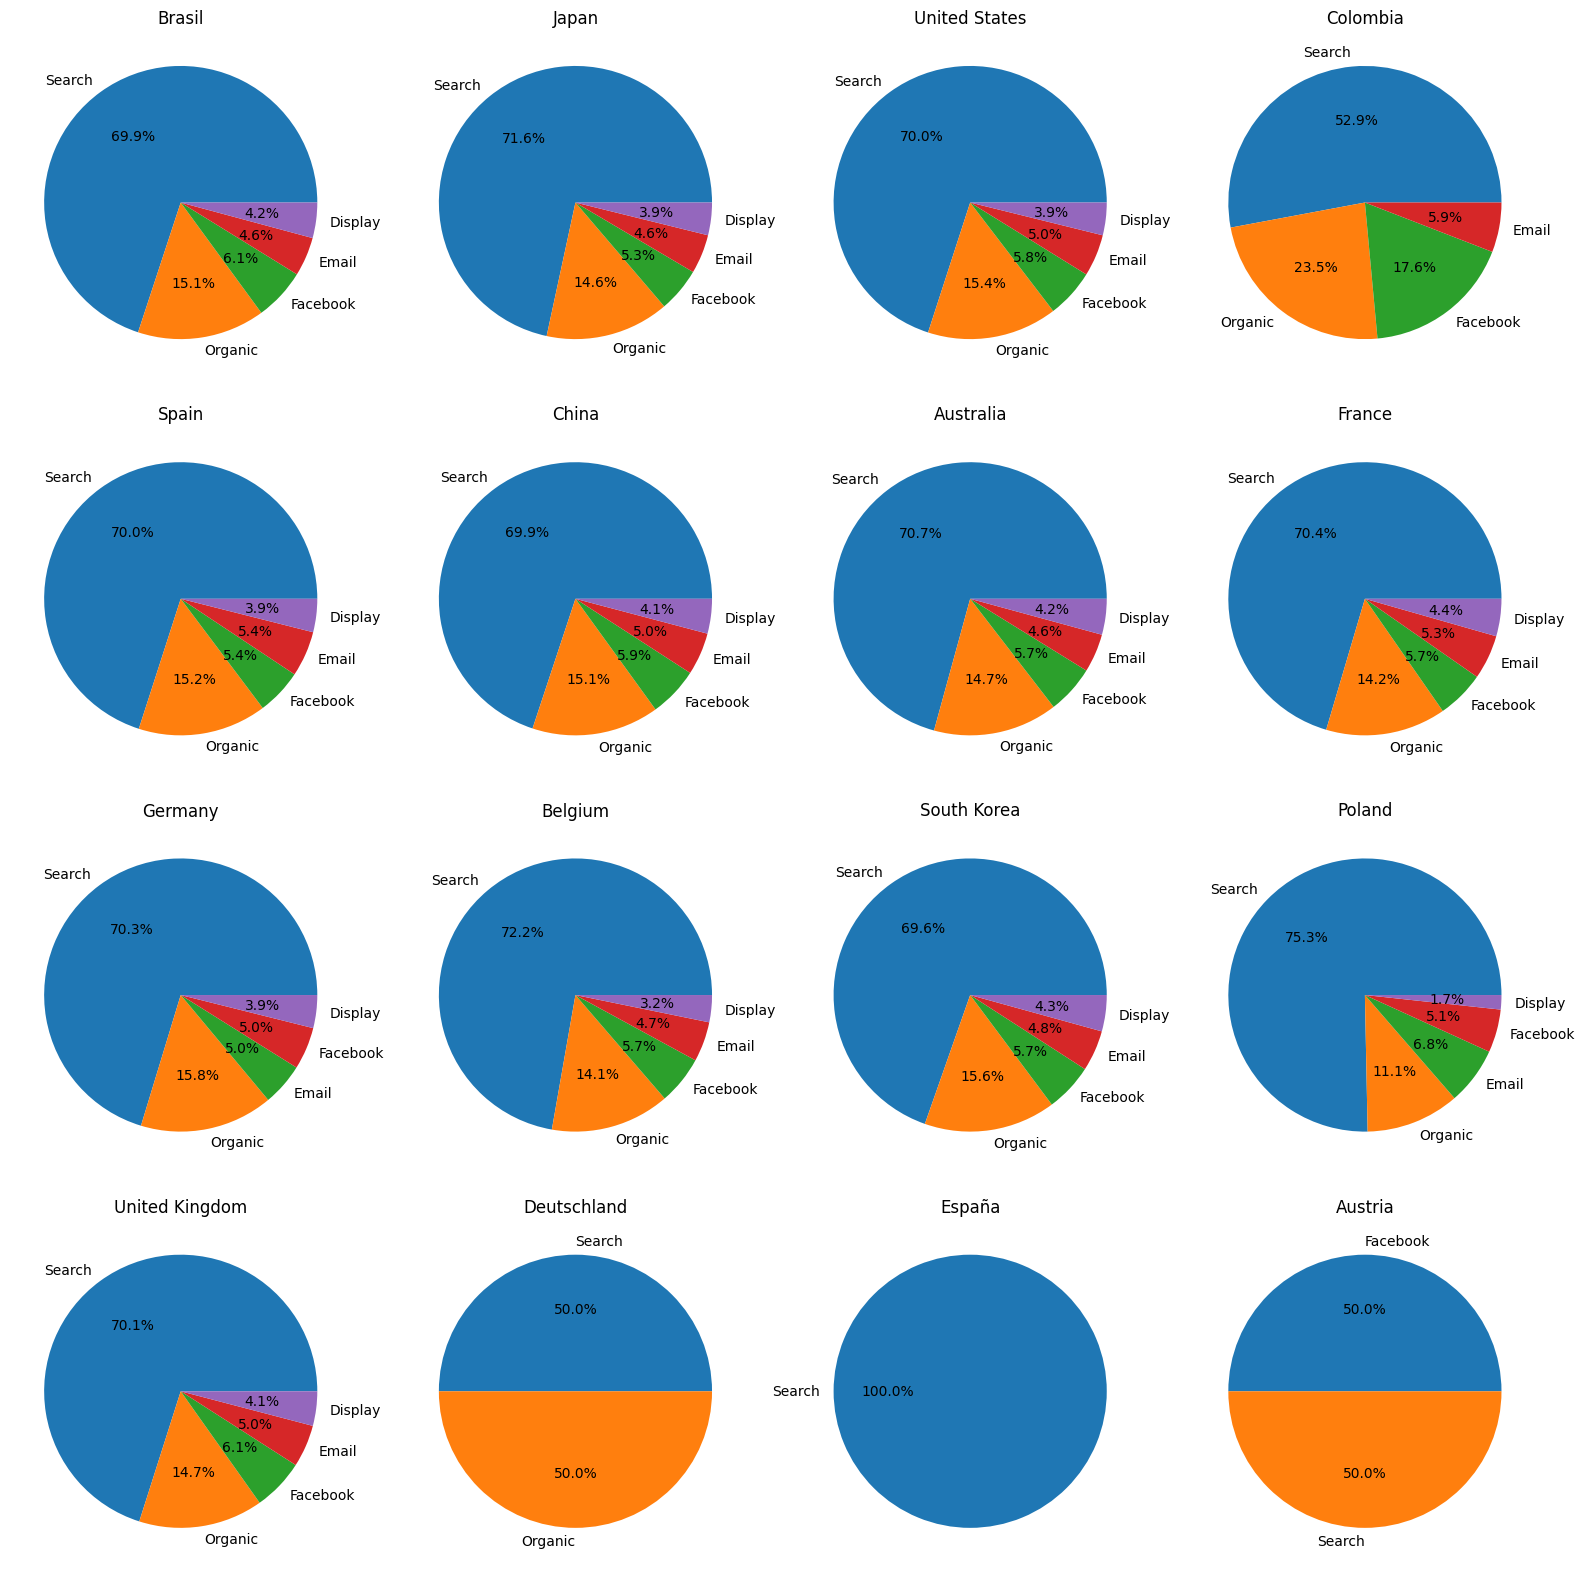

In [40]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
countries = users['country'].unique()

# Iterate over each country and create a pie chart for gender distribution
for i, country in enumerate(countries):
    ax = axs[i // 4, i % 4]
    country_data = users[users['country'] == country]
    ax.pie(country_data['traffic_source'].value_counts(), labels=country_data['traffic_source'].value_counts().index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## In all country main contributor to traffic_source is 'search'